In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests 
import zipfile

In [4]:
# co2data = pd.read_csv("GCB2022v27_MtCO2_flat.csv")
# with zipfile.ZipFile("GCB2022v27_MtCO2_flat.csv.zip", 'r') as z:
#     with z.open('GCB2022v27_MtCO2_flat.csv') as f:
#         co2data = pd.read_csv(f)

#uncomment to run
# url = "https://drive.google.com/uc?export=download&id=10FUGb7KaUviC4TMs83TlL3fBAih1Vstt"

# # Download the file
# response = requests.get(url)
# response.raise_for_status()  # Check for successful download

# # Read the CSV content into a pandas DataFrame
# co2data = pd.read_csv(io.StringIO(response.content.decode('utf-8')))

co2data.head(6)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,AFG,1755,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


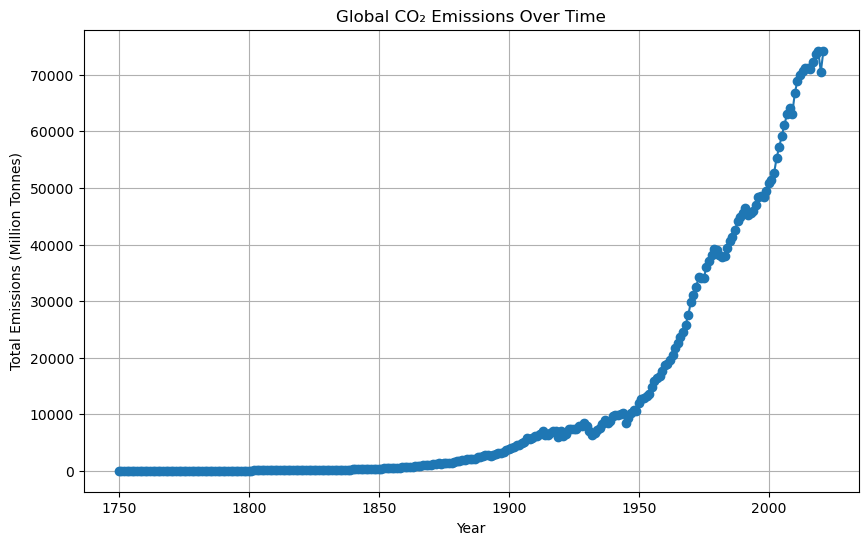

In [5]:
# Total Global CO₂ Emissions Over Time
# Group by year to calculate total CO₂ emissions
global_emissions = co2data.groupby('Year')['Total'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(global_emissions['Year'], global_emissions['Total'], marker='o', linestyle='-')
plt.title('Global CO₂ Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total Emissions (Million Tonnes)')
plt.grid(True)
plt.show()

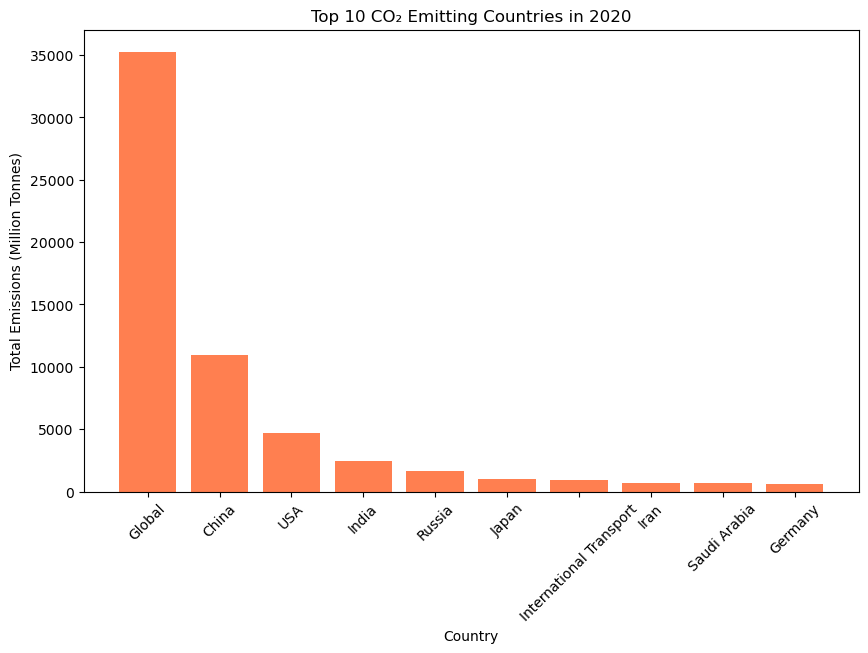

In [6]:
# Top 10 CO₂ Emitting Countries in 2020

# Filter data for the year 2020 and sort by total emissions
emissions_2020 = co2data[co2data['Year'] == 2020].sort_values(by='Total', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(emissions_2020['Country'], emissions_2020['Total'], color='coral')
plt.title('Top 10 CO₂ Emitting Countries in 2020')
plt.xlabel('Country')
plt.ylabel('Total Emissions (Million Tonnes)')
plt.xticks(rotation=45)
plt.show()

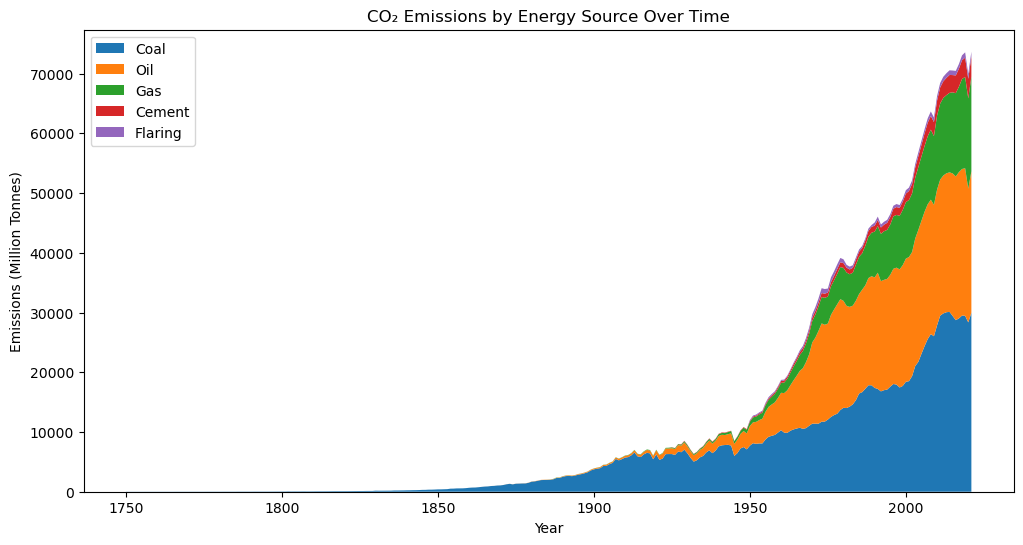

In [7]:
# CO₂ Emissions by Energy Source
# Group data by year and sum emissions by source
energy_emissions = co2data.groupby('Year')[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring']].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.stackplot(energy_emissions['Year'], 
              energy_emissions['Coal'], energy_emissions['Oil'], 
              energy_emissions['Gas'], energy_emissions['Cement'], 
              energy_emissions['Flaring'], labels=['Coal', 'Oil', 'Gas', 'Cement', 'Flaring'])
plt.title('CO₂ Emissions by Energy Source Over Time')
plt.xlabel('Year')
plt.ylabel('Emissions (Million Tonnes)')
plt.legend(loc='upper left')
plt.show()


<Figure size 1000x600 with 0 Axes>

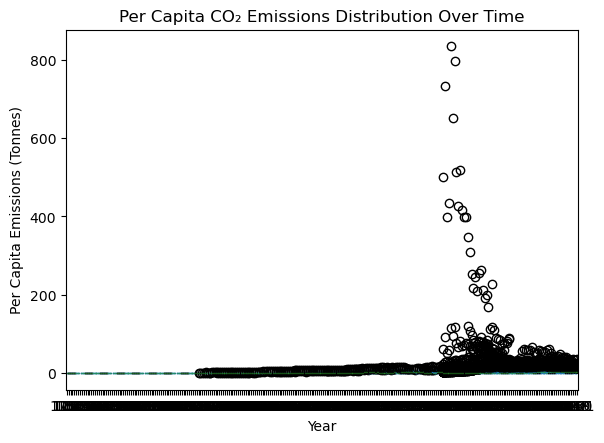

In [8]:
# Per Capita CO₂ Emissions by Country 
# Drop rows with missing 'Per Capita' values
co2_per_capita = co2data.dropna(subset=['Per Capita'])

# Plotting
plt.figure(figsize=(10, 6))
co2_per_capita.boxplot(column='Per Capita', by='Year', grid=False)
plt.title('Per Capita CO₂ Emissions Distribution Over Time')
plt.suptitle('')  # Remove the default title
plt.xlabel('Year')
plt.ylabel('Per Capita Emissions (Tonnes)')
plt.show()


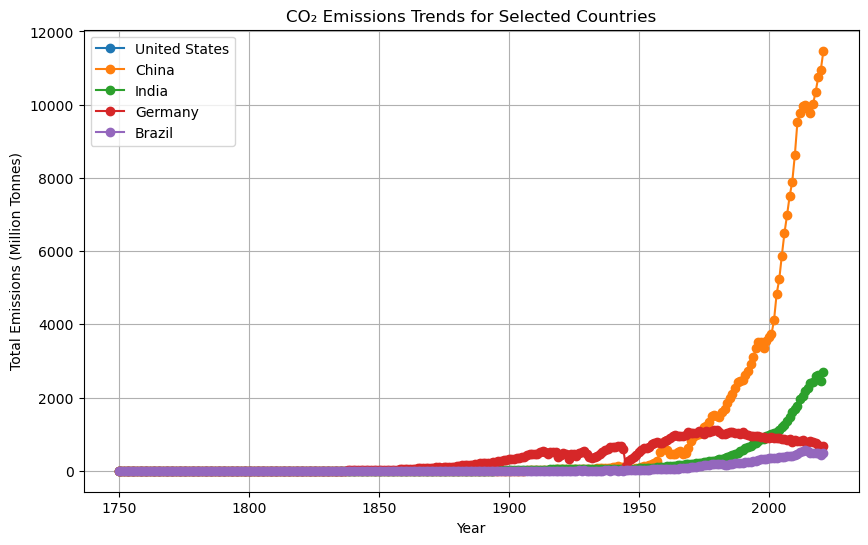

In [9]:
# CO₂ Emissions Trend for Specific Countries
# Filter for a few specific countries
countries = ['United States', 'China', 'India', 'Germany', 'Brazil']
country_data = co2data[co2data['Country'].isin(countries)]

# Plotting emissions trends for selected countries
plt.figure(figsize=(10, 6))
for country in countries:
    subset = country_data[country_data['Country'] == country]
    plt.plot(subset['Year'], subset['Total'], marker='o', label=country)

plt.title('CO₂ Emissions Trends for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Total Emissions (Million Tonnes)')
plt.legend()
plt.grid(True)
plt.show()


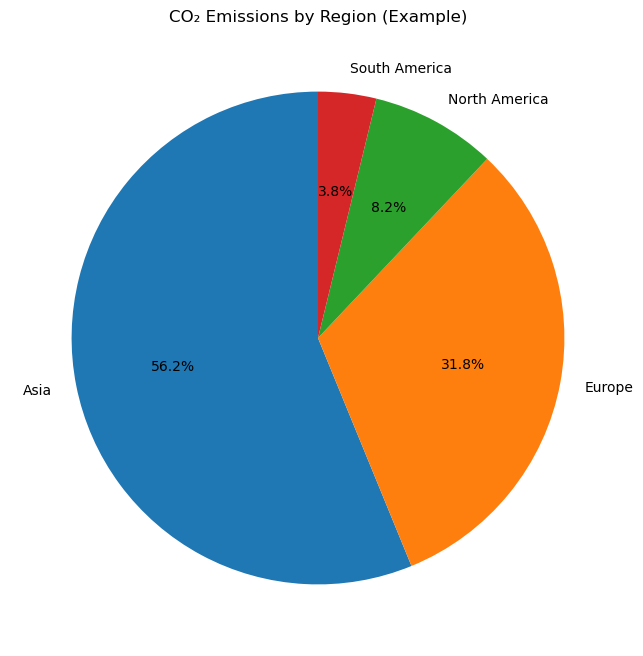

In [10]:
# CO₂ Emissions by Region 
# Sum emissions by continent or group countries into continents
# (Here we use a hypothetical grouping; adjust based on your data.)
continents = {
    'Asia': ['China', 'India', 'Japan'],
    'Europe': ['Germany', 'France', 'United Kingdom'],
    'North America': ['United States', 'Canada', 'Mexico'],
    'South America': ['Brazil', 'Argentina'],
}

# Sum emissions by region
regional_emissions = {continent: co2data[co2data['Country'].isin(countries)]['Total'].sum()
                      for continent, countries in continents.items()}

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(regional_emissions.values(), labels=regional_emissions.keys(), autopct='%1.1f%%', startangle=90)
plt.title('CO₂ Emissions by Region (Example)')
plt.show()


In [11]:
!pip install gdown

In [12]:
# data2 = pd.read_csv("GlobalLandTemperaturesByCity.csv")
# with zipfile.ZipFile("GlobalLandTemperaturesByCity.csv.zip", 'r') as z:
#     with z.open('GlobalLandTemperaturesByCity.csv') as f:
#         data2 = pd.read_csv(f)


#uncomment to run
# import gdown
# # Google Drive file ID
# file_id = "1io7xZQYx4asu5ounDWAqK-2hqVNevAfb"
# url = f"https://drive.google.com/uc?id={file_id}"

# # Download the file using gdown
# output = "GlobalLandTemperaturesByCity.csv.zip"
# gdown.download(url, output, quiet=False)

# # Open the downloaded ZIP file and read the CSV
# with zipfile.ZipFile(output, 'r') as z:
#     print(z.namelist())  # Verify the file names in the ZIP

#     # Extract and read the specific CSV
#     with z.open('GlobalLandTemperaturesByCity.csv') as f:
#         data2 = pd.read_csv(f) 

data2.head(6)

Downloading...
From (original): https://drive.google.com/uc?id=1io7xZQYx4asu5ounDWAqK-2hqVNevAfb
From (redirected): https://drive.google.com/uc?id=1io7xZQYx4asu5ounDWAqK-2hqVNevAfb&confirm=t&uuid=fb980e89-63de-41d9-a32c-513f86ccd163
To: /Users/muhammadaliasgarfataymamode/Desktop/Climate-Change-Analysis/Climate-Change-Analysis/GlobalLandTemperaturesByCity.csv.zip
100%|██████████| 75.7M/75.7M [00:07<00:00, 9.68MB/s]


['GlobalLandTemperaturesByCity.csv', '__MACOSX/._GlobalLandTemperaturesByCity.csv']


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E


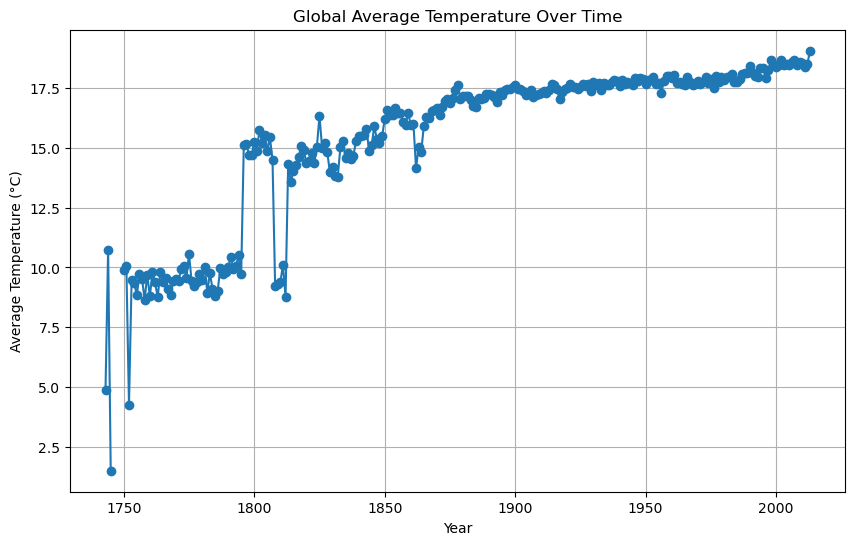

In [13]:
# Global Average Temperature Over Time
# Parse the 'dt' column to datetime and extract the year
data2['dt'] = pd.to_datetime(data2['dt'])
data2['Year'] = data2['dt'].dt.year

# Calculate the global average temperature per year
global_avg_temp = data2.groupby('Year')['AverageTemperature'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(global_avg_temp['Year'], global_avg_temp['AverageTemperature'], marker='o', linestyle='-')
plt.title('Global Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

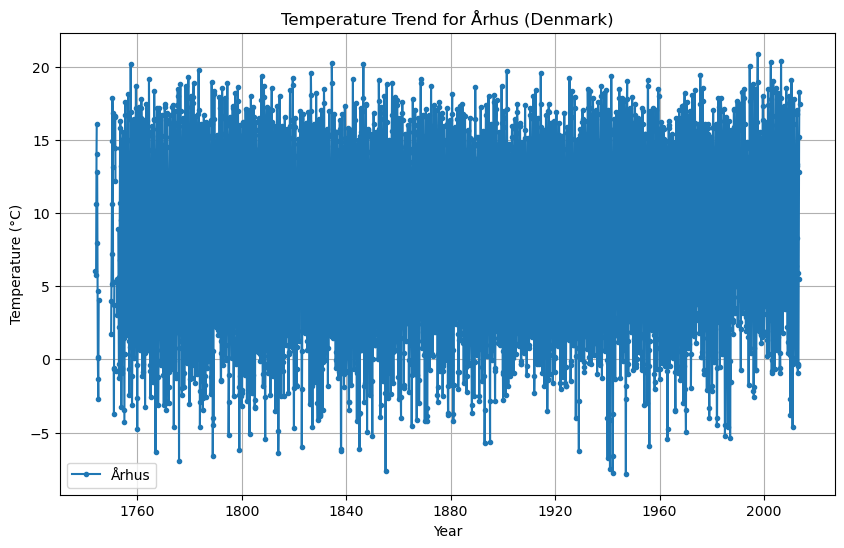

In [14]:
# Temperature Trends for a Specific City 
# Filter data for a specific city (e.g., Aarhus)
city_data = data2[data2['City'] == 'Århus']

# Plot the temperature trend for the selected city
plt.figure(figsize=(10, 6))
plt.plot(city_data['dt'], city_data['AverageTemperature'], marker='.', linestyle='-', label='Århus')
plt.title('Temperature Trend for Århus (Denmark)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

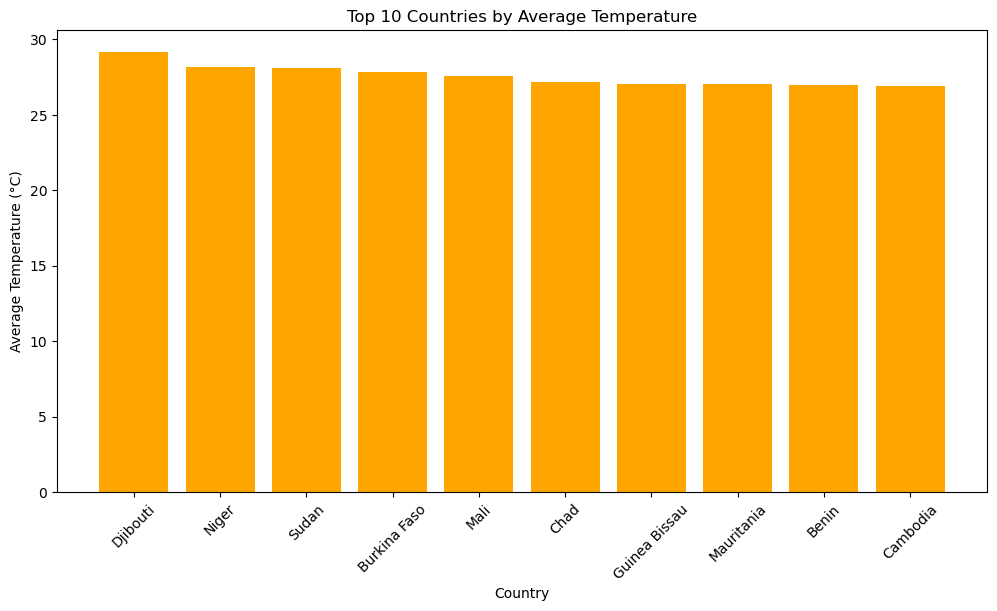

In [15]:
# Average Temperature by Country
# Calculate the average temperature per country
country_avg_temp = data2.groupby('Country')['AverageTemperature'].mean().reset_index()

# Plot the top 10 countries with the highest average temperature
top_countries = country_avg_temp.sort_values(by='AverageTemperature', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_countries['Country'], top_countries['AverageTemperature'], color='orange')
plt.title('Top 10 Countries by Average Temperature')
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

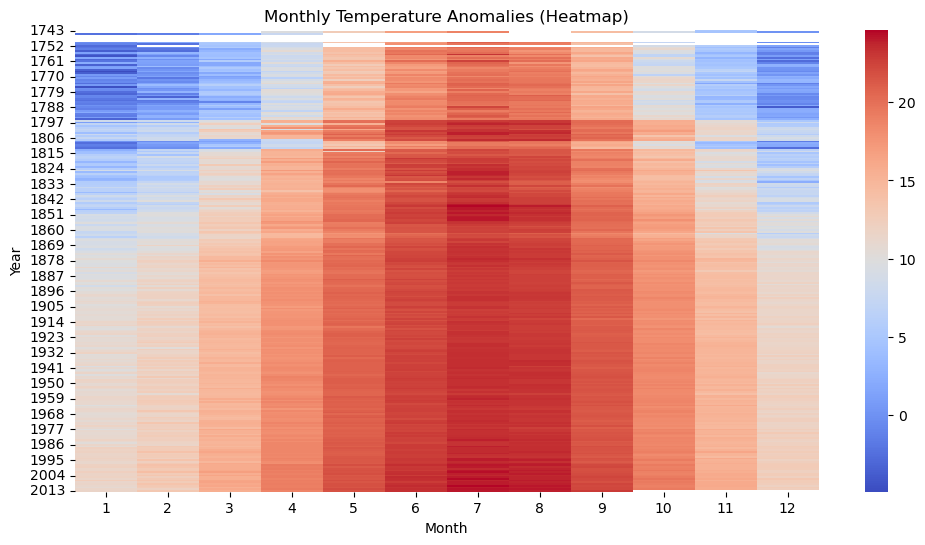

In [16]:
# Monthly Temperature Anomalies 
import seaborn as sns

# Extract year and month from 'dt'
data2['Month'] = data2['dt'].dt.month

# Calculate average temperature per month across years
monthly_avg_temp = data2.groupby(['Year', 'Month'])['AverageTemperature'].mean().unstack()

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_avg_temp, cmap='coolwarm', annot=False)
plt.title('Monthly Temperature Anomalies (Heatmap)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

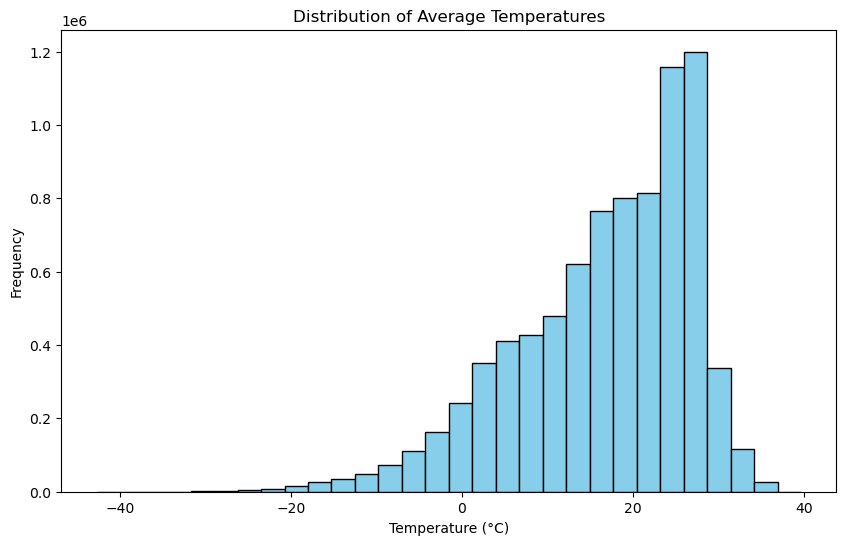

In [17]:
# Average Temperature Distribution
# Drop rows with NaN temperature values
temp_data = data2.dropna(subset=['AverageTemperature'])

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(temp_data['AverageTemperature'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()
